In [1]:
from IPython.core.display import HTML
HTML(open('D:/localmts/python/css1.py').read())

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
from helper import load_sample_data_from_dir

In [8]:
# to explore window functions load  the cash market data
cm_sample_data_location = 'D:/findataf/cm_sample_data'
cm_df = load_sample_data_from_dir(cm_sample_data_location)

In [9]:
# drop the extra column
cm_df.drop('Unnamed: 13', axis=1, inplace=True)

In [10]:
# convert TIMESTAMP to a datetime column dtp - datetime proper
cm_df['dtp'] = pd.to_datetime(cm_df['TIMESTAMP'],format='%d-%b-%Y').dt.date

In [12]:
# sort the dataframe by date and symbol
cm_df['mavg-5'] = cm_df.sort_values(['dtp', 'SYMBOL']).groupby(
    'SYMBOL')['CLOSE'].transform(
    lambda x: x.rolling(5, min_periods=1).mean())
# verify 
cm_df.loc[cm_df.SYMBOL=='INFY',['dtp','CLOSE','mavg-5']]

,dtp,CLOSE,mavg-5
1040,2023-06-01,1319.50,1319.500000
3461,2023-06-02,1299.00,1309.250000
5900,2023-06-05,1304.50,1307.666667
8336,2023-06-06,1279.00,1300.500000
10770,2023-06-07,1288.95,1298.190000
13188,2023-06-08,1282.80,1290.850000
15602,2023-06-09,1265.95,1284.240000
18023,2023-06-12,1291.95,1281.730000
20461,2023-06-13,1304.85,1286.900000
22923,2023-06-14,1300.40,1289.190000


In [13]:
cm_df['mavg-20'] = cm_df.sort_values(['SYMBOL', 'dtp']).groupby(
    'SYMBOL')['CLOSE'].transform(
    lambda x: x.rolling(20, min_periods=1).mean())

In [15]:
cm_df['mavg-20'] = cm_df.sort_values(['dtp','SYMBOL']).groupby(
    'SYMBOL')['CLOSE'].transform(
    lambda x: x.rolling(20, min_periods=1).mean())
# verify
cm_df.loc[cm_df.SYMBOL=='INFY',['dtp','CLOSE','mavg-5', 'mavg-20']]

,dtp,CLOSE,mavg-5,mavg-20
1040,2023-06-01,1319.50,1319.500000,1319.500000
3461,2023-06-02,1299.00,1309.250000,1309.250000
5900,2023-06-05,1304.50,1307.666667,1307.666667
8336,2023-06-06,1279.00,1300.500000,1300.500000
10770,2023-06-07,1288.95,1298.190000,1298.190000
13188,2023-06-08,1282.80,1290.850000,1295.625000
15602,2023-06-09,1265.95,1284.240000,1291.385714
18023,2023-06-12,1291.95,1281.730000,1291.456250
20461,2023-06-13,1304.85,1286.900000,1292.944444
22923,2023-06-14,1300.40,1289.190000,1293.690000


In [16]:
# laod the futures and options dataframe to explore rank window function
fut_df_data_location = 'D:/findataf/fo_sample_data'
fut_df = load_sample_data_from_dir(fut_df_data_location)
# drop the extra column due to trailing comma in the source files
fut_df.drop(['Unnamed: 15'],axis=1,inplace=True)

In [17]:
fut_df['dtp'] = pd.to_datetime(fut_df['TIMESTAMP'],format='%d-%b-%Y')
sample_fut_df = fut_df.loc[(fut_df.SYMBOL == 'ITC') | (fut_df.SYMBOL == 'SBIN'),:]

In [20]:
sample_fut_df.loc['oirank'] = sample_fut_df.sort_values(
    ['dtp','SYMBOL','INSTRUMENT','EXPIRY_DT','OPTION_TYP']).groupby(
    ['dtp','SYMBOL','INSTRUMENT','EXPIRY_DT','OPTION_TYP'])['OPEN_INT'].transform(
    lambda x: x.rank())

C:\Users\SAMAR\AppData\Local\Temp\ipykernel_2516\2347042505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_fut_df.loc['oirank'] = sample_fut_df.sort_values(


In [24]:
pd.options.display.max_rows = 500 
sample_fut_df.loc[(sample_fut_df.dtp == '2023-06-02') & (sample_fut_df.SYMBOL == 'ITC') 
                   & (sample_fut_df.OPTION_TYP == 'CE'), ['STRIKE_PR','OPEN_INT', 'oirank']].sort_values(
    'OPEN_INT', ascending=False)

,STRIKE_PR,OPEN_INT,oirank
74999,450.5,5323200.0,114.0
74991,440.5,3097600.0,113.0
75015,470.5,2987200.0,112.0
75007,460.5,2838400.0,111.0
74983,430.5,2222400.0,110.0
74994,445.0,2145600.0,109.0
75003,455.5,2080000.0,108.0
74998,450.0,1942400.0,107.0
75035,500.0,1542400.0,106.0
75023,480.5,1532800.0,105.0


In [26]:
select_stocks_filter = (cm_df.SYMBOL == 'INFY') | (cm_df.SYMBOL == 'TCS') | (cm_df.SYMBOL == 'HCLTECH') 
| (cm_df.SYMBOL=='TECHM') | (cm_df.SYMBOL == 'WIPRO')
select_stocks_df = cm_df.loc[select_stocks_filter , ['SYMBOL','dtp','CLOSE']].sort_values(['SYMBOL','dtp'])

In [28]:
tcs_df = cm_df.loc[(cm_df.SYMBOL=='TCS'), ['dtp', 'CLOSE']].sort_values('dtp').reset_index()
tcs_df

,index,dtp,CLOSE
0,2199,2023-06-01,3324.00
1,4613,2023-06-02,3305.60
2,7076,2023-06-05,3288.90
3,9497,2023-06-06,3232.30
4,11933,2023-06-07,3274.90
5,14347,2023-06-08,3236.45
6,16760,2023-06-09,3209.30
7,19196,2023-06-12,3246.90
8,21637,2023-06-13,3243.70
9,24084,2023-06-14,3251.05


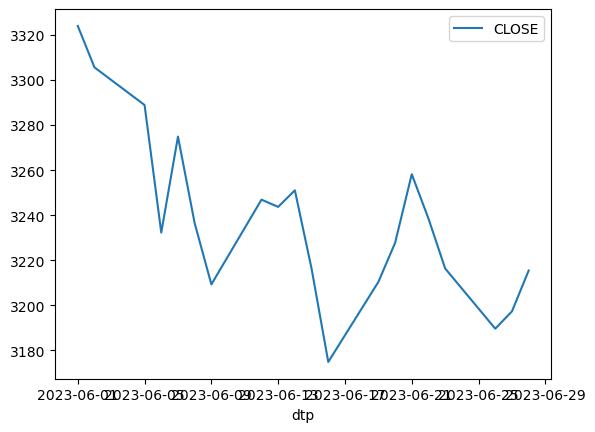

In [29]:
tcs_df.plot(x='dtp',y='CLOSE')
plt.show()

C:\Users\SAMAR\AppData\Local\Temp\ipykernel_2516\2510368128.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tcs_df.dtp.astype('str'), rotation=45, ha='right')


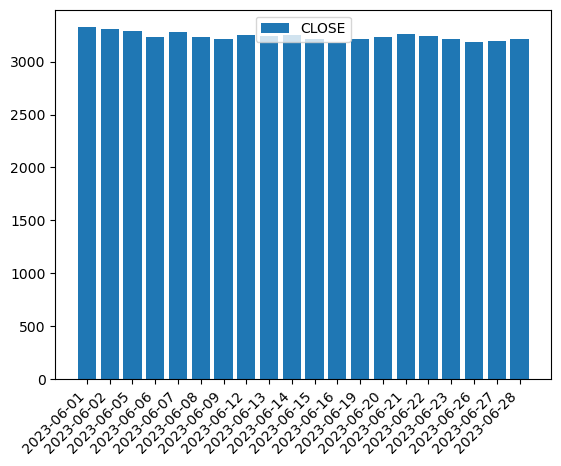

In [30]:
fig, ax = plt.subplots()
# if do not cast the dtp to string, there will be gaps between the bars
# ax.bar(tcs_df.dtp, tcs_df.CLOSE,  label='CLOSE', align='center')
ax.bar(tcs_df.dtp.astype('str'), tcs_df.CLOSE,  label='CLOSE', align='center')
ax.set_xticklabels(tcs_df.dtp.astype('str'), rotation=45, ha='right')
ax.legend()
plt.show()

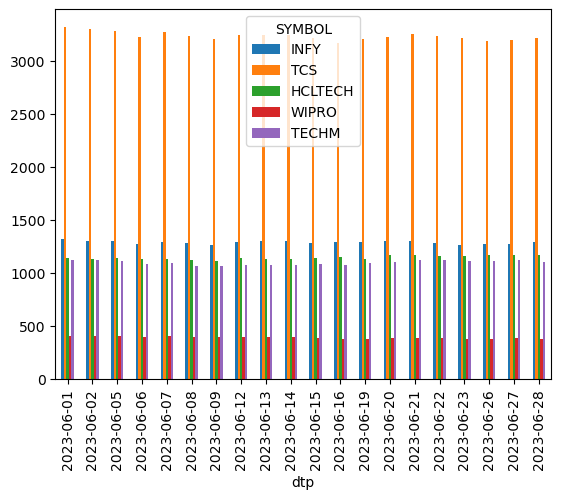

In [31]:
ssdp = pd.pivot_table(select_stocks_df,index='dtp',columns='SYMBOL',values='CLOSE',aggfunc='sum').reset_index()
ssdp.plot.bar('dtp',['INFY','TCS','HCLTECH', 'WIPRO', 'TECHM'])
plt.show()

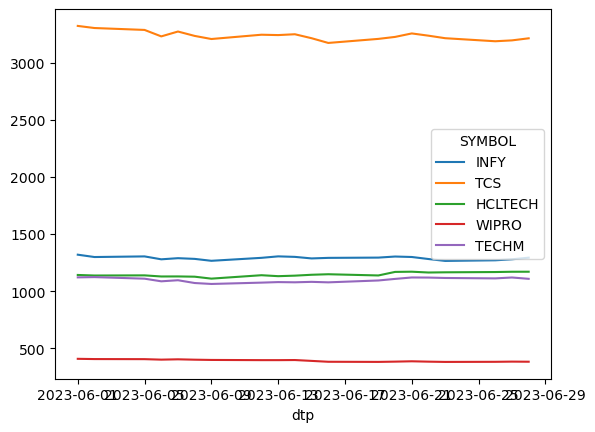

In [32]:
ssdp.plot.line('dtp',['INFY','TCS','HCLTECH', 'WIPRO', 'TECHM'])
plt.show()